# Case2-1: DatetimeIndexを使ってみる  
Use DatetimeIndex

In [1]:
%matplotlib inline
import seaborn as sns
import datetime
import numpy as np
import pandas as pd

In [2]:
# set display number of lines
pd.options.display.max_rows = 10

## pandas.date_rangeで日付範囲データを作成  
Generate date range by pandas.date_range

In [3]:
date_range = pd.date_range('2015-1-1', '2016-12-31', freq='B')

In [4]:
date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=522, freq='B')

### freqのパラメータ  
Frequency strings

> DateOffset objects  
> http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects

|文字                 |オフセットクラス  |説明                                                  |
|:--------------------|:-----------------|:-----------------------------------------------------|
|D                    |Day               |暦通りの日次                                          |
|B                    |BusinessDay       |毎営業日                                              |
|H                    |Hour              |毎時                                                  |
|Tまたはmin           |Minute            |毎分                                                  |
|S                    |Second            |毎秒                                                  |
|Lまたはms            |Milli             |毎ミリ秒                                              |
|U                    |Micro             |毎マイクロ秒                                          |
|M                    |MonthEnd          |暦通りの月末毎                                        |
|BM                   |BusinessMonthEnd  |月の最終営業日毎                                      |
|MS                   |MonthBegin        |暦通りの月初毎                                        |
|BMS                  |BusinessMonthBegin|月の営業開始日毎                                      |
|W-MON,W-TUE,...      |Week              |毎週指定した曜日毎                                    |
|WOM-1MON,WOM-2MON,...|WeekOfMonth       |月の1～4週目の指定した曜日毎                          |
|Q-JAN,Q-FEB,...      |QuarterEnd        |指定した月に年度が変わる前提で、四半期の暦通りの月末毎|
|BQ-JAN,BQ-FEB,...    |BusinessQuarterEnd|指定した月に年度が変わる前提で、四半期の最終営業日毎  |
|QS-JAN,QS-FEB,...    |QuarterBegin      |指定した月に年度が変わる前提で、四半期の暦通りの月初毎|
|BQS-JAN,BQS-FEB,...  |QuarterBegin      |指定した月に年度が変わる前提で、四半期の営業開始日毎  |
|A-JAN,A-FEB,...      |YearEnd           |1年に1度、指定した月の暦通りの月末毎                  |
|BA-JAN,BA-FEB,...    |BusinessYearEnd   |1年に1度、指定した月の最終営業日毎                    |
|AS-JAN,AS-FEB,...    |YearBegin         |1年に1度、指定した月の暦通りの月初毎                  |
|BAS-JAN,BAS-FEB,...  |YearBegin         |1年に1度、指定した月の営業開始日毎                    |

[Case1-3](Case1-3.ipynb)と同様に次の確率微分方程式にしたがう確率過程 Stを求める([幾何ブラウン運動](https://ja.wikipedia.org/wiki/幾何ブラウン運動 "Wikipedia"))  
A stochastic process St is said to follow a [GBM](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) if it satisfies the following stochastic differential equation  

$$dS_t = \mu S_t\,dt + \sigma S_t\,dB_t$$  

今回は日毎にデータを変化させていく  
Generate sample stock price per day

In [5]:
def generate_stock_price(S0, t, r, sigma, path, steps):
    dt = float(t) / steps
    w = np.cumsum(np.reshape(np.random.standard_normal(path * steps), (path, steps)), 1) * (np.sqrt(dt))
    t = np.cumsum(np.ones((path, steps)), 1) * dt   
    return S0 * np.exp((r - 0.5 * np.power(sigma, 2)) * t + sigma * w)

In [6]:
days = len(date_range)
stock_price = generate_stock_price(1000, days / 365.0, 0.001, 0.2, 3, days)
df = pd.DataFrame(stock_price.T, index=date_range, columns=['price1', 'price2', 'price3'])

In [7]:
df.head()

,price1,price2,price3
2015-01-01,991.861194,997.910607,1001.796769
2015-01-02,979.980041,991.857092,1001.848722
2015-01-05,986.289025,998.307525,998.044901
2015-01-06,999.428422,1013.960012,1009.804495
2015-01-07,998.631567,1019.361142,1015.102474


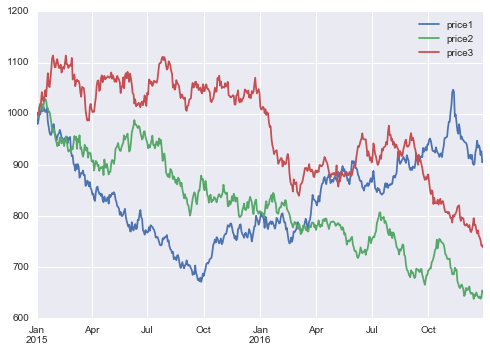

In [8]:
df.plot()

## datetime.date型で参照  
select data in datetime.date

In [9]:
df.loc[datetime.date(2016, 1, 1)]

price1     798.054222
price2     809.358270
price3    1014.173586
Name: 2016-01-01 00:00:00, dtype: float64

## datetime.datetime型で参照  
select data in datetime.date

In [10]:
df.loc[datetime.datetime(2016, 1, 1, 0, 0)]

price1     798.054222
price2     809.358270
price3    1014.173586
Name: 2016-01-01 00:00:00, dtype: float64

## str型で参照  
select data in str

In [11]:
df.loc['2016/1/1']

price1     798.054222
price2     809.358270
price3    1014.173586
Name: 2016-01-01 00:00:00, dtype: float64

In [12]:
df.loc['20160101']

price1     798.054222
price2     809.358270
price3    1014.173586
Name: 2016-01-01 00:00:00, dtype: float64

In [13]:
df.loc['Jan 01, 2016']

price1     798.054222
price2     809.358270
price3    1014.173586
Name: 2016-01-01 00:00:00, dtype: float64

## 年でスライス  
slice data by year

In [14]:
df.loc['2016':].head()

,price1,price2,price3
2016-01-01,798.054222,809.358270,1014.173586
2016-01-04,806.316950,807.604171,1008.355931
2016-01-05,799.202549,806.565589,1009.320679
2016-01-06,800.081923,805.040197,1013.681875
2016-01-07,793.271538,798.795607,1011.700668


## 月でスライス  
slice data by month

In [15]:
df.loc['2015-5'].head()

,price1,price2,price3
2015-05-01,837.009384,886.649435,1072.378371
2015-05-04,840.336403,903.931459,1080.705193
2015-05-05,844.834928,909.749401,1068.535314
2015-05-06,842.873983,908.078985,1075.204765
2015-05-07,846.700765,902.002681,1068.779835


In [16]:
df.loc['2015-12':'2016-01']

,price1,price2,price3
2015-12-01,783.900468,799.964579,1029.405005
2015-12-02,769.855111,801.352064,1023.736598
2015-12-03,764.689743,811.245834,1028.440721
2015-12-04,762.304527,816.781102,1030.060731
2015-12-07,757.510765,824.547914,1036.441198
...,...,...,...
2016-01-25,781.029255,842.336175,921.212086
2016-01-26,775.500207,829.522069,926.255782
2016-01-27,781.888393,825.425253,926.571055
2016-01-28,796.637367,807.692596,928.839656


## インデックスに含まれていないタイムスタンプを範囲に含めることもできる  
possible to include timestampe out of index

In [17]:
df.loc['2016-01-02':'2016-01-10']

,price1,price2,price3
2016-01-04,806.316950,807.604171,1008.355931
2016-01-05,799.202549,806.565589,1009.320679
2016-01-06,800.081923,805.040197,1013.681875
2016-01-07,793.271538,798.795607,1011.700668
2016-01-08,777.016994,804.757991,1001.448169


## datetime.time型で参照  
select data in datetime.time type

In [18]:
# Generate 100 hourly data
ser = pd.Series(generate_stock_price(100, 0.2, 0, 0.2, 100, 1).T[0],
               index=pd.date_range('2016-01-01', periods=100, freq='H'))

In [19]:
ser.head()

2016-01-01 00:00:00     96.751575
2016-01-01 01:00:00     87.056143
2016-01-01 02:00:00    111.111371
2016-01-01 03:00:00     94.447358
2016-01-01 04:00:00    103.940072
Freq: H, dtype: float64

### datetime.timeで参照すると指定した時刻を抜き出すことができる  
Select specified time data by datetime.time

In [20]:
ser[datetime.time(9, 0)]

2016-01-01 09:00:00     85.667254
2016-01-02 09:00:00    104.510887
2016-01-03 09:00:00     79.050860
2016-01-04 09:00:00    101.583655
Freq: 24H, dtype: float64

### 内部では.at_time()メソッドが動作している  
In inside .at_time() is working

In [21]:
ser.at_time(datetime.time(9, 0))

2016-01-01 09:00:00     85.667254
2016-01-02 09:00:00    104.510887
2016-01-03 09:00:00     79.050860
2016-01-04 09:00:00    101.583655
Freq: 24H, dtype: float64

### .between_time()メソッドを使うと、時刻の範囲を指定できる  
To specify time range using .between_time()

In [22]:
ser.between_time(datetime.time(9, 0), datetime.time(12, 0))

2016-01-01 09:00:00     85.667254
2016-01-01 10:00:00     96.597690
2016-01-01 11:00:00    107.764341
2016-01-01 12:00:00     88.912065
2016-01-02 09:00:00    104.510887
                          ...    
2016-01-03 12:00:00    100.034646
2016-01-04 09:00:00    101.583655
2016-01-04 10:00:00     94.116798
2016-01-04 11:00:00    101.299849
2016-01-04 12:00:00     93.220470
dtype: float64

---

# Case2-2: 四本値を作成、範囲を変換  
Create OHLC data and covert time range

## .resample()メソッドを使って月足に変換  
Convert daily data into monthly data using .resample()

In [23]:
df['price1'].resample('M').ohlc()

,open,high,low,close
2015-01-31,991.861194,1019.302446,958.842417,962.389455
2015-02-28,958.582808,968.497049,917.211435,917.211435
2015-03-31,918.474538,918.474538,854.478228,854.478228
2015-04-30,851.165546,857.622829,824.305061,841.782955
2015-05-31,837.009384,846.700765,784.293780,784.293780
...,...,...,...,...
2016-08-31,862.049766,926.004607,860.926160,908.221334
2016-09-30,895.412769,939.876333,889.935131,939.876333
2016-10-31,939.795078,952.919528,915.316402,952.919528
2016-11-30,954.218756,1047.144480,945.790881,945.790881


## 四本値から異なる頻度の四本値のデータに変換してみる  
convert an OHLC data into another OHLC data

### [Yahoo Finance](https://finance.yahoo.com "yahoo finance")からS&P指数の四本値を取ってくる  
extract data from Yahoo Finance into a DataFrame

In [24]:
from pandas_datareader import data
try:
    gspc = data.DataReader("^GSPC", 'yahoo', datetime.datetime(2006, 1, 1), datetime.datetime(2015, 12, 31))
except Exception:
    gspc = pd.read_msgpack('data/^GSPC.mpack')

In [25]:
gspc.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,1248.290039,1270.219971,1245.739990,1268.800049,2554570000,1268.800049
2006-01-04,1268.800049,1275.369995,1267.739990,1273.459961,2515330000,1273.459961
2006-01-05,1273.459961,1276.910034,1270.300049,1273.479980,2433340000,1273.479980
2006-01-06,1273.479980,1286.089966,1273.479980,1285.449951,2446560000,1285.449951
2006-01-09,1285.449951,1290.780029,1284.819946,1290.150024,2301490000,1290.150024


### 普通にresample().ohlc()を実行すると・・・  
Run resample().ohlc()

In [26]:
gspc.resample('W').ohlc().head()

Open                                                High  \
                   open         high          low        close         open   
Date                                                                          
2006-01-08  1248.290039  1273.479980  1248.290039  1273.479980  1270.219971   
2006-01-15  1285.449951  1294.180054  1285.449951  1286.060059  1290.780029   
2006-01-22  1287.609985  1287.609985  1277.930054  1285.040039  1287.609985   
2006-01-29  1261.489990  1273.829956  1261.489990  1273.829956  1268.189941   
2006-02-05  1283.719971  1285.199951  1270.839966  1270.839966  1287.939941   

                                                           Low               \
                   high          low        close         open         high   
Date                                                                          
2006-01-08  1286.089966  1270.219971  1286.089966  1245.739990  1273.479980   
2006-01-15  1294.900024  1288.959961  1288.959961  1284.819946  1288.119995   
2006-01-22  1287.790039  1282.930054  1285.040039  1278.609985  1278.609985   
2006-01-29  1286.380005  1268.189941  1286.380005  1261.489990  1273.829956   
2006-02-05  1287.939941  1270.869995  1270.869995  1283.510010  1283.510010   

               ...             Close                   Volume              \
               ...               low        close        open        high   
Date           ...                                                          
2006-01-08     ...       1268.800049  1285.449951  2554570000  2554570000   
2006-01-15     ...       1286.060059  1287.609985  2301490000  2406130000   
2006-01-22     ...       1261.489990  1261.489990  2179970000  2845810000   
2006-01-29     ...       1263.819946  1283.719971  2256070000  2856780000   
2006-02-05     ...       1264.030029  1264.030029  2282730000  2708310000   

                                      Adj Close                            \
                   low       close         open         high          low   
Date                                                                        
2006-01-08  2433340000  2446560000  1268.800049  1285.449951  1268.800049   
2006-01-15  2206510000  2206510000  1290.150024  1294.180054  1286.060059   
2006-01-22  2179970000  2845810000  1282.930054  1285.040039  1261.489990   
2006-01-29  2256070000  2623620000  1263.819946  1283.719971  1263.819946   
2006-02-05  2282210000  2282210000  1285.189941  1285.189941  1264.030029   

                         
                  close  
Date                     
2006-01-08  1285.449951  
2006-01-15  1287.609985  
2006-01-22  1261.489990  
2006-01-29  1283.719971  
2006-02-05  1264.030029  

[5 rows x 24 columns]

### 各列毎のohlcを集計してしまうので、四本値毎の集計した値から必要な値を持ってくる  
Select applicable data from above results

In [27]:
gspc_weekly_ohlc = gspc.resample('W').ohlc()[[('Open', 'open'), ('High', 'high'), ('Low', 'low'), ('Close', 'close')]]
gspc_weekly_ohlc.columns = gspc_weekly_ohlc.columns.droplevel()

In [28]:
gspc_weekly_ohlc.head()

,open,high,low,close
Date,,,,
2006-01-08,1248.290039,1286.089966,1245.739990,1285.449951
2006-01-15,1285.449951,1294.900024,1282.780029,1287.609985
2006-01-22,1287.609985,1287.790039,1260.920044,1261.489990
2006-01-29,1261.489990,1286.380005,1259.420044,1283.719971
2006-02-05,1283.719971,1287.939941,1261.020020,1264.030029


## 番外編: HighChartsでローソク足を表示してみる  
Appendix: visualize candle stick chart by HighCharts

### Python3の場合
python-highchartsはPython3に対応していないので、forkしたリポジトリからインストール  

For Python3  
Install python-highcharts from forked repository 

    git clone -b issue37-Python3 https://github.com/JrtPec/python-highcharts.git
    cd python-highcharts
    python setup.py install

In [29]:
import charts
gspc['Time'] = gspc.index.astype(np.int64)//1000000
series = [{'type':'candlestick',
           'name':'candle',
           'data':gspc[['Time', 'Open', 'High', 'Low', 'Close']].values}]

options = {'rangeSelector':{'selected':0},
           'xAxis':{'gridLineWidth':1, 'gridLineDashStyle':'Dot'},
           'yAxis':{'gridLineWidth':1, 'gridLineDashStyle':'Dot'}}

charts.plot(series, stock=True, show='inline', options=options, display=['candle'])

Server running in the folder D:\Dropbox\common\pyconjp2016\pyconjp2016 at 127.0.0.1:51191
